In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [8]:
import zipfile as zf

files = zf.ZipFile(r'C:\Users\karth\Downloads\Flowers-Dataset.zip')
files.extractall()
files.close()

In [9]:
cd C:\proj


C:\proj


In [10]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 46C8-E9DC

 Directory of C:\proj

07-10-2022  21:42    <DIR>          .
07-10-2022  20:45       235,663,188 Flowers-Dataset.zip
               1 File(s)    235,663,188 bytes
               1 Dir(s)  375,611,621,376 bytes free


In [11]:
import glob
import zipfile

In [13]:
files = glob.glob('C:\proj\Flowers-Dataset.zip')

In [14]:
files

['C:\\proj\\Flowers-Dataset.zip']

In [15]:
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('data/raw')

Unzipping: C:\proj\Flowers-Dataset.zip


In [16]:
file

'C:\\proj\\Flowers-Dataset.zip'

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen= ImageDataGenerator(rescale=1./255,zoom_range = 0.2,horizontal_flip =True,vertical_flip =False)

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
x_train = train = train_datagen.flow_from_directory(r'C:\proj\data\raw\flowers\rose',target_size = (10,10),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [22]:
x_train.class_indices

{}

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [25]:
model= Sequential()

In [26]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = 'relu')) 

In [27]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [28]:
model.add(Flatten())

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150,activation ='relu'))

In [31]:
model.add(Dense(4,activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [33]:
len(x_train)

0

In [34]:
1238/24

51.583333333333336

In [36]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 46C8-E9DC

 Directory of C:\proj

07-10-2022  21:45    <DIR>          .
07-10-2022  21:45    <DIR>          data
07-10-2022  20:45       235,663,188 Flowers-Dataset.zip
               1 File(s)    235,663,188 bytes
               2 Dir(s)  374,741,274,624 bytes free


In [37]:
model.save('flower.h5')

In [38]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 46C8-E9DC

 Directory of C:\proj

07-10-2022  21:52    <DIR>          .
07-10-2022  21:45    <DIR>          data
07-10-2022  21:52        37,110,944 flower.h5
07-10-2022  20:45       235,663,188 Flowers-Dataset.zip
               2 File(s)    272,774,132 bytes
               2 Dir(s)  374,704,152,576 bytes free


In [39]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
odel = load_model('flower.h5')

In [41]:
pwd

'C:\\proj'

In [42]:
img = image.load_img(r'C:\proj\data\raw\flowers\rose\4900231976_f8ced2b42a_n.jpg')

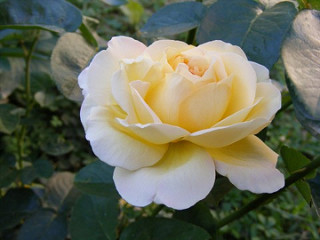

In [43]:
img

In [45]:
img = image.load_img(r'C:\proj\data\raw\flowers\rose\4900231976_f8ced2b42a_n.jpg',target_size=(64,64))

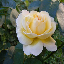

In [46]:
img

In [47]:
x=image.img_to_array(img)

In [48]:
x

array([[[ 38.,  68.,  56.],
        [ 36.,  57.,  48.],
        [ 48.,  70.,  83.],
        ...,
        [ 56.,  69.,   0.],
        [ 62.,  85.,   3.],
        [ 64.,  89.,   6.]],

       [[ 37.,  54.,  44.],
        [ 48.,  63.,  68.],
        [ 45.,  67.,  78.],
        ...,
        [ 90.,  73.,   3.],
        [ 74.,  86.,  10.],
        [ 85.,  99.,  22.]],

       [[ 29.,  43.,  28.],
        [ 33.,  51.,  55.],
        [ 60.,  85., 105.],
        ...,
        [ 85.,  81.,  69.],
        [100., 105.,  82.],
        [ 77.,  92.,  49.]],

       ...,

       [[ 16.,  25.,  20.],
        [ 10.,  19.,  14.],
        [ 13.,  18.,  11.],
        ...,
        [ 59.,  59.,  33.],
        [ 65.,  81.,  42.],
        [ 50.,  58.,  37.]],

       [[ 16.,  21.,  17.],
        [ 13.,  19.,  19.],
        [ 17.,  23.,  21.],
        ...,
        [ 45.,  53.,  42.],
        [ 42.,  59.,  23.],
        [ 62.,  79.,  61.]],

       [[ 12.,  17.,  10.],
        [ 12.,  17.,  20.],
        [ 17.,  

In [49]:
x.shape

(64, 64, 3)

In [50]:
x=np.expand_dims(x,axis=0)

In [51]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 2s 2s/step


In [52]:
y

array([2], dtype=int64)

In [53]:
x_train.class_indices

{}

In [54]:
index = ['daisy','dandelion','rose','sunflower','tulip']

In [61]:
index[y[-1]]

'rose'

In [62]:
index[1]

'dandelion'